In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import os
import json


In [3]:
# Dataset directory
dataset_dir = "garbage_dataset"

# Data generator for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

# Training data
train_data = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Validation data
val_data = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

print("✅ Classes found:", train_data.class_indices)

# Save class indices for later use
with open("class_indices.json", "w") as f:
    json.dump(train_data.class_indices, f)


Found 15813 images belonging to 10 classes.
Found 3949 images belonging to 10 classes.
✅ Classes found: {'battery': 0, 'biological': 1, 'cardboard': 2, 'clothes': 3, 'glass': 4, 'metal': 5, 'paper': 6, 'plastic': 7, 'shoes': 8, 'trash': 9}
Found 3949 images belonging to 10 classes.
✅ Classes found: {'battery': 0, 'biological': 1, 'cardboard': 2, 'clothes': 3, 'glass': 4, 'metal': 5, 'paper': 6, 'plastic': 7, 'shoes': 8, 'trash': 9}


In [4]:
# Load pre-trained MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base layers

# Build the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(train_data.num_classes, activation='softmax')
])

# Compile
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Model: "sequential"
_________________________________

In [5]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)


Epoch 1/10




495/495 [==============================] - 450s 905ms/step - loss: 0.9689 - accuracy: 0.6958 - val_loss: 0.5137 - val_accuracy: 0.8298
Epoch 2/10
495/495 [==============================] - 450s 905ms/step - loss: 0.9689 - accuracy: 0.6958 - val_loss: 0.5137 - val_accuracy: 0.8298
Epoch 2/10
495/495 [==============================] - 168s 339ms/step - loss: 0.4795 - accuracy: 0.8463 - val_loss: 0.3972 - val_accuracy: 0.8706
Epoch 3/10
495/495 [==============================] - 168s 339ms/step - loss: 0.4795 - accuracy: 0.8463 - val_loss: 0.3972 - val_accuracy: 0.8706
Epoch 3/10
495/495 [==============================] - 166s 336ms/step - loss: 0.3979 - accuracy: 0.8723 - val_loss: 0.3465 - val_accuracy: 0.8871
Epoch 4/10
495/495 [==============================] - 166s 336ms/step - loss: 0.3979 - accuracy: 0.8723 - val_loss: 0.3465 - val_accuracy: 0.8871
Epoch 4/10
495/495 [==============================] - 163s 330ms/step - loss: 0.3597 - accuracy: 0.8828 - val_loss: 0.32

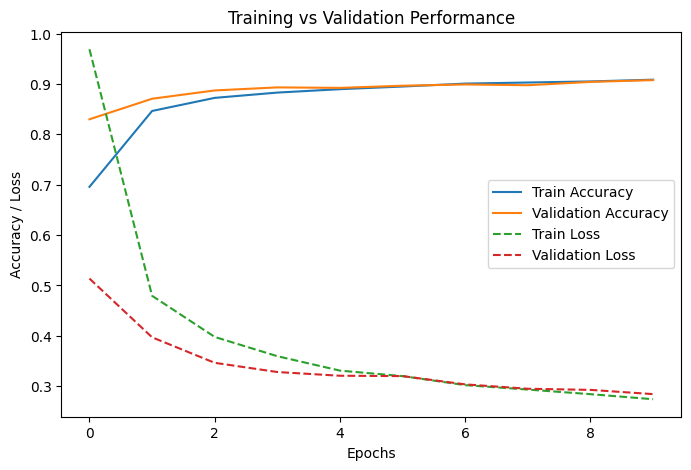

In [6]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Train Loss', linestyle='--')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--')
plt.title("Training vs Validation Performance")
plt.xlabel("Epochs")
plt.ylabel("Accuracy / Loss")
plt.legend()
plt.show()


In [7]:
import numpy as np
import json
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# 1️⃣ Load the fine-tuned model
model = load_model("waste_classifier_model_finetuned.h5")

# 2️⃣ Load saved class labels
with open("class_indices.json", "r") as f:
    class_indices = json.load(f)
class_labels = list(class_indices.keys())

# 3️⃣ Path to test image (use your correct path)
img_path = r"C:\Users\manis\Desktop\Study\Waste\plastic_3.jpg"

# 4️⃣ Load and preprocess image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# 5️⃣ Predict
predictions = model.predict(img_array)
pred_class = np.argmax(predictions)

print("🟢 Predicted Class:", class_labels[pred_class])


1/1 [==============================] - 1s 690ms/step
🟢 Predicted Class: plastic
1/1 [==============================] - 1s 690ms/step
🟢 Predicted Class: plastic


1/1 [==============================] - 0s 74ms/step

Classification Report:
              precision    recall  f1-score   support

     battery       0.90      0.96      0.93       188
  biological       0.95      0.94      0.95       199
   cardboard       0.87      0.94      0.90       365
     clothes       0.98      0.99      0.98      1065
       glass       0.92      0.91      0.91       612
       metal       0.84      0.85      0.85       204
       paper       0.90      0.85      0.87       336
     plastic       0.86      0.83      0.85       396
       shoes       0.96      0.95      0.96       395
       trash       0.76      0.79      0.78       189

    accuracy                           0.92      3949
   macro avg       0.90      0.90      0.90      3949
weighted avg       0.92      0.92      0.92      3949


Confusion Matrix:
[[ 181    0    2    0    1    2    1    1    0    0]
 [   0  188    2    0    1    1    3    2    1    1]
 [   6    0  342    1    1    0    8    

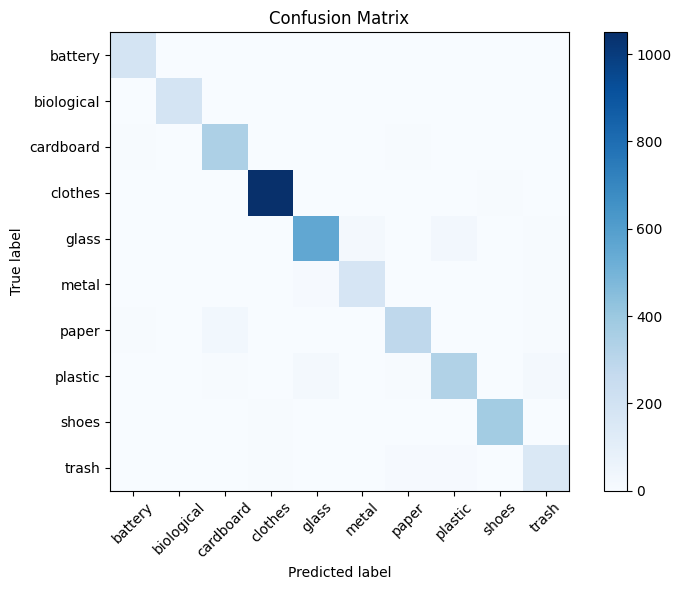

In [8]:
# 📊 Evaluate model: accuracy, confusion matrix, per-class metrics
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Get true labels and predictions for validation set
val_data.reset()
y_true = []
y_pred = []
for i in range(len(val_data)):
    X, y = val_data[i]
    preds = model.predict(X)
    y_true.extend(np.argmax(y, axis=1))
    y_pred.extend(np.argmax(preds, axis=1))
    if (i+1)*val_data.batch_size >= val_data.samples:
        break

class_labels = list(val_data.class_indices.keys())
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

cm = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:")
print(cm)

plt.figure(figsize=(8,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

In [9]:
# 🔄 Fine-tune: unfreeze some base layers and continue training
from tensorflow.keras.optimizers import Adam

# Unfreeze top 40 layers of base model for fine-tuning
base_model = model.layers[0]
base_model.trainable = True
for layer in base_model.layers[:-40]:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

history_finetune = model.fit(
    train_data,
    validation_data=val_data,
    epochs=5  # You can increase for more improvement
)

model.save("waste_classifier_model_finetuned.h5")
print("✅ Fine-tuned model saved as waste_classifier_model_finetuned.h5")

Epoch 1/5
495/495 [==============================] - 178s 354ms/step - loss: 0.2220 - accuracy: 0.9237 - val_loss: 0.2594 - val_accuracy: 0.9174
Epoch 2/5
495/495 [==============================] - 178s 354ms/step - loss: 0.2220 - accuracy: 0.9237 - val_loss: 0.2594 - val_accuracy: 0.9174
Epoch 2/5
495/495 [==============================] - 176s 355ms/step - loss: 0.1941 - accuracy: 0.9342 - val_loss: 0.2455 - val_accuracy: 0.9202
Epoch 3/5
495/495 [==============================] - 176s 355ms/step - loss: 0.1941 - accuracy: 0.9342 - val_loss: 0.2455 - val_accuracy: 0.9202
Epoch 3/5
495/495 [==============================] - 175s 354ms/step - loss: 0.1830 - accuracy: 0.9395 - val_loss: 0.2319 - val_accuracy: 0.9314
Epoch 4/5
495/495 [==============================] - 175s 354ms/step - loss: 0.1830 - accuracy: 0.9395 - val_loss: 0.2319 - val_accuracy: 0.9314
Epoch 4/5
495/495 [==============================] - 175s 353ms/step - loss: 0.1702 - accuracy: 0.9430 - val_loss: 0.2254 - val_ac

C:\Users\manis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
